In [1]:
#--------------------------------------------------Chennai House Rent---------------------------------------------------------


#Current Solution :-

    #House rents are decided in old-fashioned ways and by talking to the peoples.
    
    #there is no data-dirven approach, so price always not fair.
    
    #people depend on brokers, which is more expensive.
    

#propossed solution :-

    #using machine learning models to predict house rent in accurately.
    
    #providing fair rental pricing for owners and tenant.
    
    #reduce denpendence on brokers and manual price estiamtion.
    

#Benifits :-
    
    #predict accurate house rent price based on data.
    
    #Save time and effort in negotiating rent prices.
    
    #stop unfair pricing.
    
    #help owners and tenants to make right choice.
    

#Dataset :-

    #unwanted data is available (animal allowed).
    
    #this data is slightly not enough, but sqft will improve the model prediction.
    
    #This business problem we will use regression algorithms.
    
    
#Eda :-

    #Uni variate analysis.
    
    #Bi variate analysis.
    
    #Multivariate analysis.
    

#Data Preprocessing :-

    #Handle missing values. (Fillna(),FFill(),BFill(), Interpolation, Dropna())
    
    #indentify the outliers and remove. (IQR, Zscore, boxplot, scatterplot)
    
    #Remove duplicates if needed. (Duplicated(),Drop_Duplictes())
    
    #transformations (Log(), sqrt(), cube, Exponential).
    
    #feture Scalling (Binarizer, Min_max_Scaller, Standardization, Normalization, Robust Scaling).
    
    #Blance classes if needed. (Smote)
    
    #Encoding Categorical values. (norminal for One-hot-encoding, ordinal for label-encoding).
    

#Feature Selection :-
    
    #remove high correlated feature's.(corr())

    #Select the Feature values and target value manualy for model train.
    

#Algorithm Selection :-
    
    #Train test split to split the 80% of data to train the model and 20% data will be tested.
    
    #train with all Regression algorithms and find the best algorithm for this business problem.
    
    #Finally choose the best algorithm with tunning and check with best accuracy score (Mae, Mse, Rmse, R2_Score).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("C:/Users/91801/Desktop/Projects/Chennai House Rent/dataset/Chennai_House_Rent.csv")
df

,city,area,rooms,bathroom,parking_spaces,animal_allowed,furniture,property_tax,fire_insurance,total_rent
0,Chennai,Perungalathur,3,3,2,not acept,not furnished,0,72,6822
1,Chennai,Choolaimedu,4,5,2,acept,not furnished,0,273,18273
2,Chennai,Guduvancheri,1,1,1,not acept,not furnished,39,63,7056
3,Chennai,Kotturpuram,1,1,0,acept,not furnished,210,27,3477
4,Chennai,Thalambur,4,4,4,acept,not furnished,3240,420,48060
...,...,...,...,...,...,...,...,...,...,...
848,Chennai,Kolapakkam,1,1,1,not acept,furnished,300,66,10656
849,Chennai,Madipakkam,2,2,2,not acept,furnished,0,135,11676
850,Chennai,Karapakkam,2,1,1,not acept,not furnished,102,39,3942
851,Chennai,Mangadu,3,3,3,acept,not furnished,1431,291,31710


In [4]:
#drop_duplicates 

df.drop_duplicates(inplace=True)

In [5]:
#descritive Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 852
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            817 non-null    object
 1   area            817 non-null    object
 2   rooms           817 non-null    int64 
 3   bathroom        817 non-null    int64 
 4   parking_spaces  817 non-null    int64 
 5   animal_allowed  817 non-null    object
 6   furniture       817 non-null    object
 7   property_tax    817 non-null    int64 
 8   fire_insurance  817 non-null    int64 
 9   total_rent      817 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 70.2+ KB


In [6]:
df.describe()

,rooms,bathroom,parking_spaces,property_tax,fire_insurance,total_rent
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.00000
mean,2.365973,1.979192,1.578947,455.959608,98.739290,9685.19339
std,1.085541,1.360618,1.536787,646.892102,101.104679,8701.17432
min,1.000000,1.000000,0.000000,0.000000,9.000000,2133.00000
25%,1.000000,1.000000,1.000000,93.000000,39.000000,4293.00000
50%,2.000000,1.000000,1.000000,225.000000,63.000000,6447.00000
75%,3.000000,2.000000,2.000000,534.000000,114.000000,11127.00000
max,7.000000,7.000000,8.000000,5694.000000,678.000000,61680.00000


In [7]:
df.describe(include="object")

,city,area,animal_allowed,furniture
count,817,817,817,817
unique,1,220,2,2
top,Chennai,Guduvancheri,acept,not furnished
freq,817,34,662,706


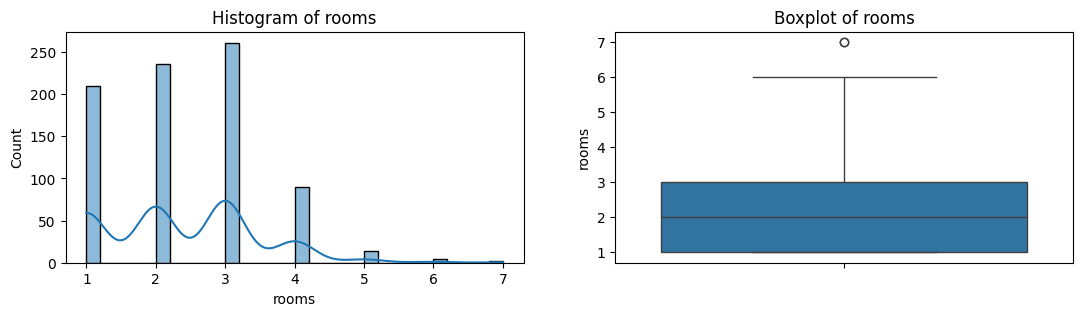

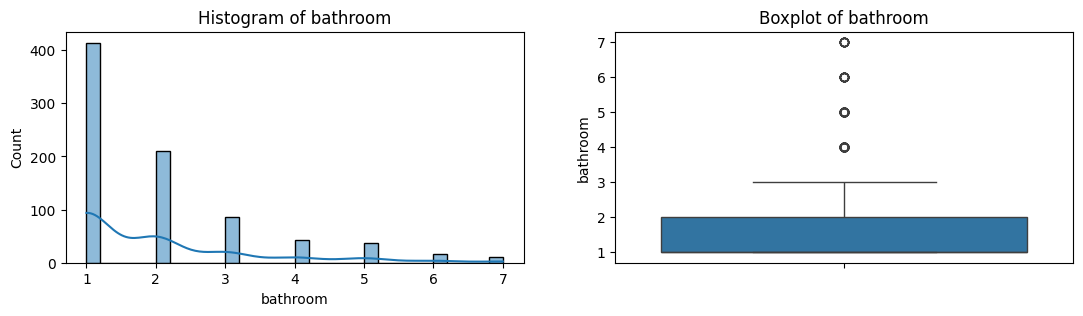

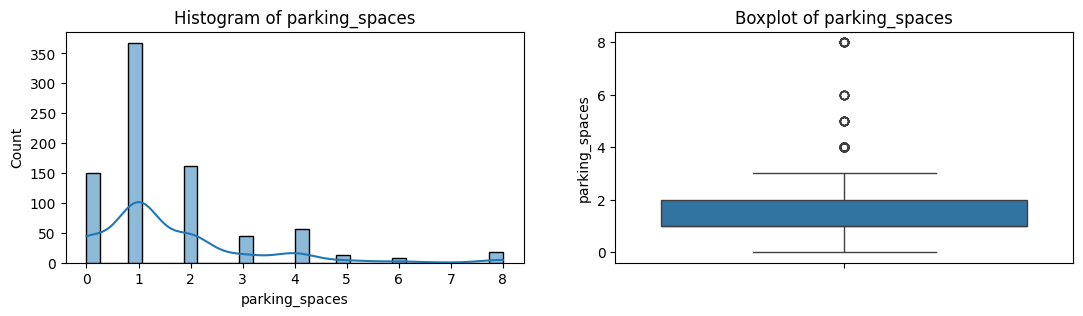

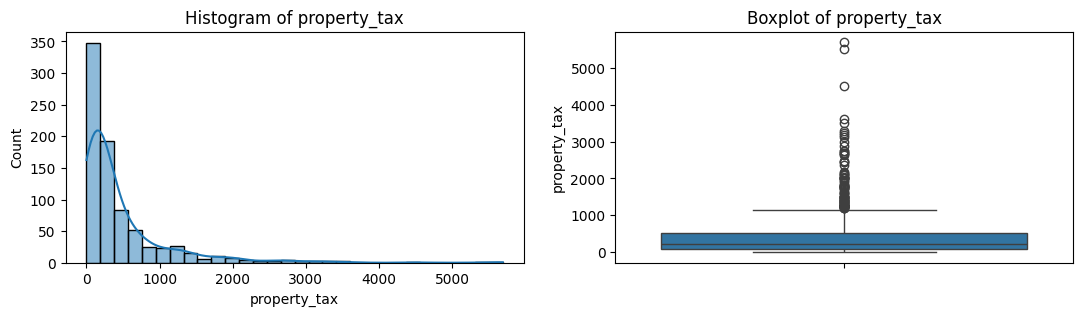

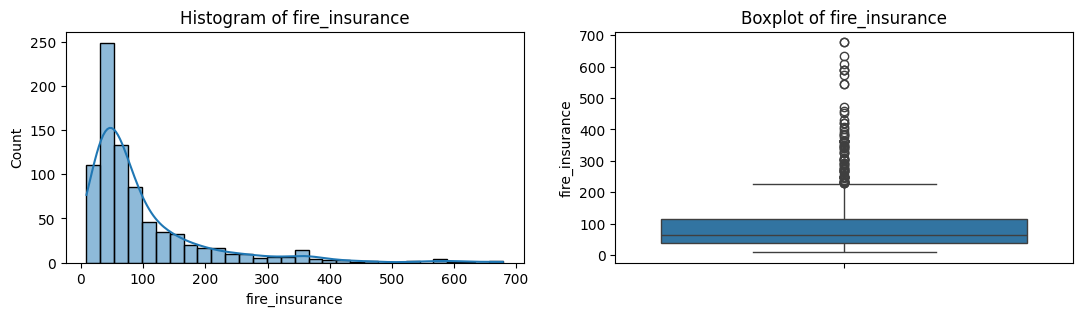

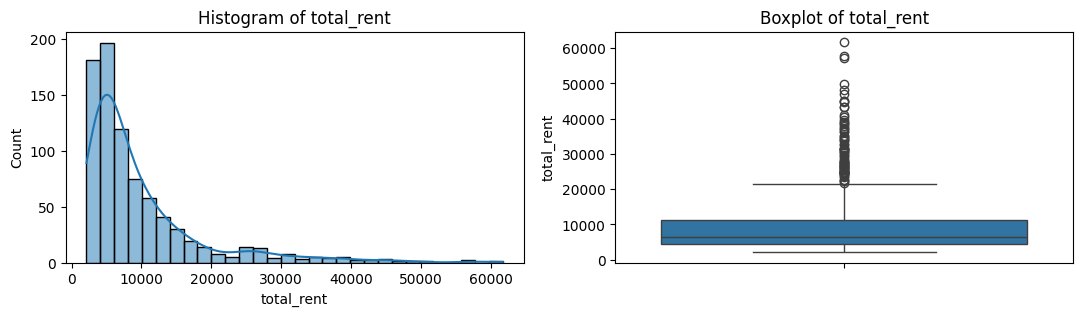

In [8]:
#----------------------------------------------EDA (Exploratory Data analysis)------------------------------------------------

num_features = df[["rooms","bathroom","parking_spaces","property_tax","fire_insurance","total_rent"]]

for col in num_features:
    plt.figure(figsize=(13, 3))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

[Text(0.5, 1.0, 'furniture with rooms')]

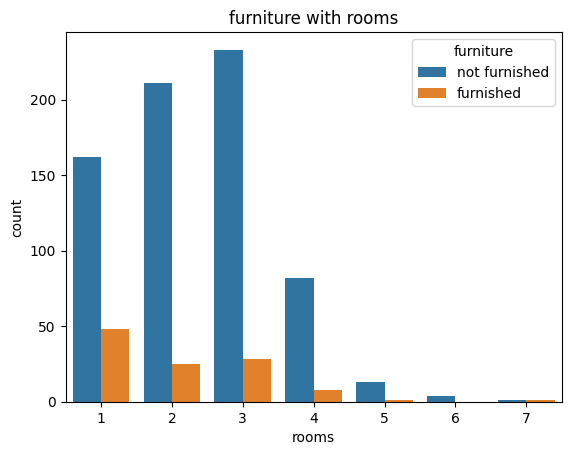

In [9]:
sns.countplot(data=df, x="rooms", hue="furniture").set(title="furniture with rooms")

[Text(0.5, 1.0, 'furniture with bathroom')]

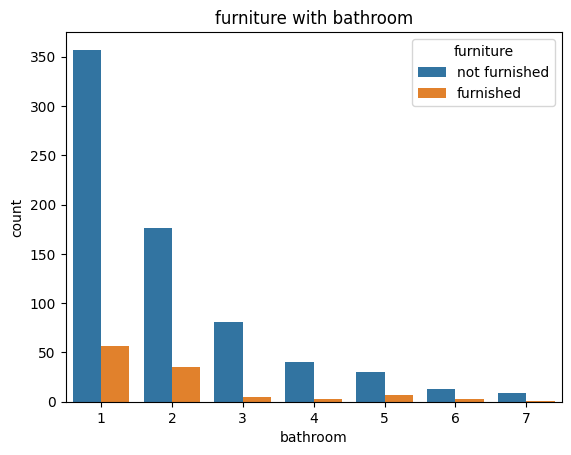

In [10]:
sns.countplot(data=df, x="bathroom", hue="furniture").set(title="furniture with bathroom")

[Text(0.5, 1.0, 'parking space & furniture with total rent')]

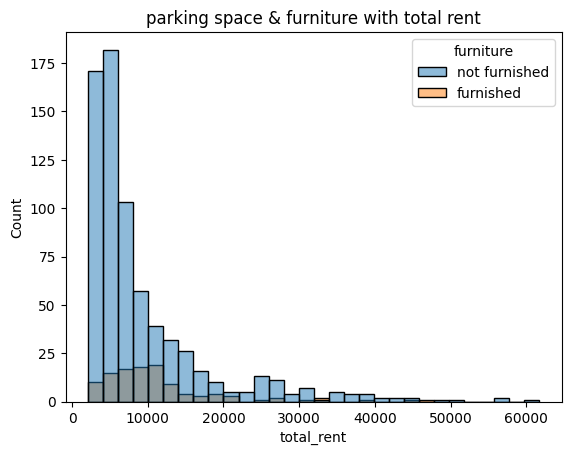

In [11]:
sns.histplot(data=df,x="total_rent", hue="furniture", bins=30).set(title="parking space & furniture with total rent")

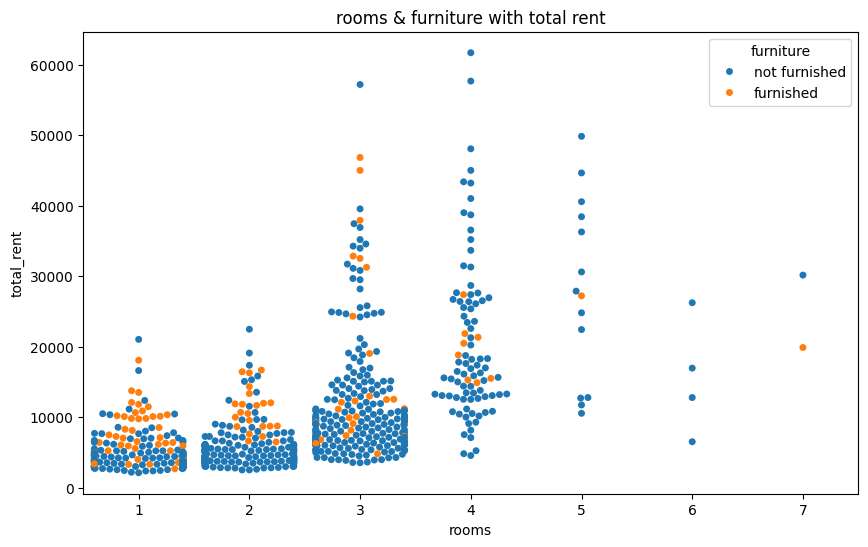

In [12]:
warnings.simplefilter("ignore")

plt.figure(figsize=(10, 6))
sns.swarmplot(data=df,x="rooms", y="total_rent", hue="furniture",size=5).set(title="rooms & furniture with total rent")
plt.show()

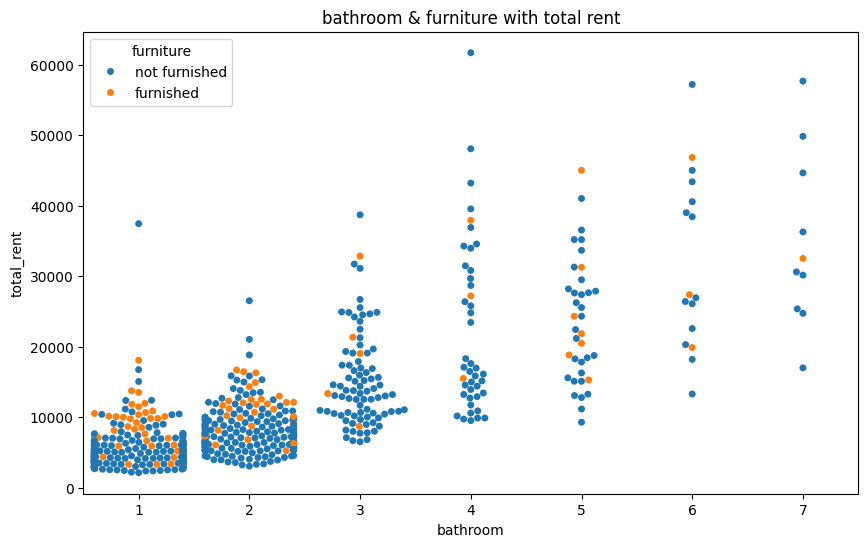

In [13]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x="bathroom", y="total_rent", hue="furniture").set(title="bathroom & furniture with total rent")
plt.show()

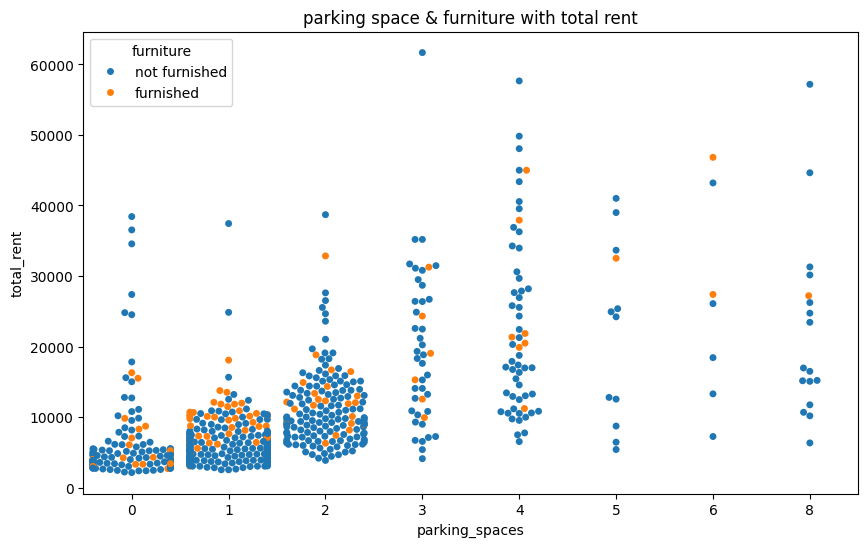

In [14]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=df, x="parking_spaces", y="total_rent", hue="furniture").set(title="parking space & furniture with total rent")
plt.show()

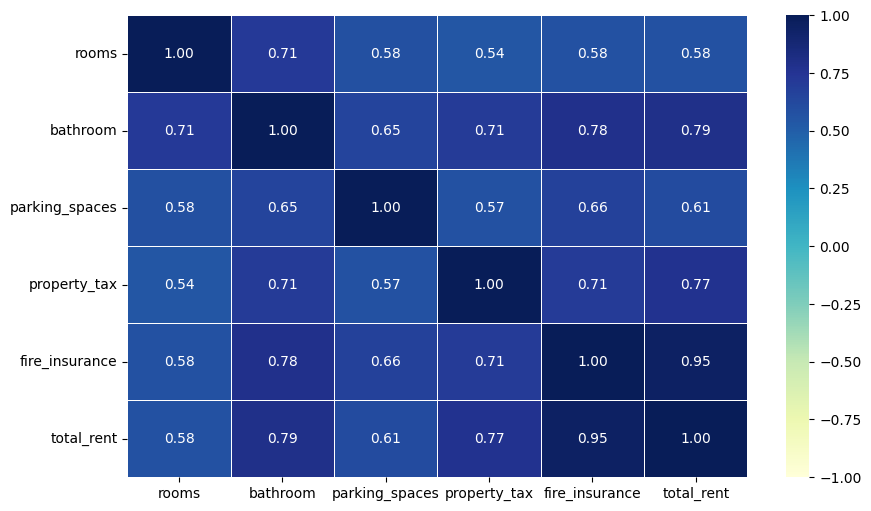

In [16]:
cor = df.select_dtypes(include="number").corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cor, annot=True, cmap="YlGnBu", fmt=".2f",vmin=-1, vmax=1, linewidths=0.5, linecolor="white") #YlGnBu,coolwarm,Blues
plt.show()

In [17]:
#Label Encoding

LE = LabelEncoder()
df["area"] = LE.fit_transform(df["area"])
df["furniture"] = LE.fit_transform(df["furniture"])

In [18]:
#Transformation

df["property_tax"] = np.log1p(df["property_tax"])
df["total_rent"] = np.log1p(df["total_rent"])

In [19]:
#select the Feature and Target

x = df[["area", "rooms", "bathroom", "parking_spaces", "furniture", "property_tax"]]
y = df["total_rent"]

In [20]:
#train test split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [21]:
#Train, predict and check the store the metrics score

algorithm = {
    "LinearRegression" : LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(alpha=0.0001, max_iter=100, selection="cyclic"),
    "ElasticNet":ElasticNet(alpha=0.0001, fit_intercept=True, l1_ratio=0.1, max_iter=1000),
    "DecisionTreeRegressor" : DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10),
    "RandomForestRegressor" : RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200),
    "GradientBoostingResgressor" : GradientBoostingRegressor(learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50),
    "XGBRegressor" : XGBRegressor(colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9),
    "KNeighborsRegressor" : KNeighborsRegressor(algorithm="brute", leaf_size=10, metric="manhattan", n_neighbors=5, p=1, weights="distance"),
#     "SVR" : SVR()
}

result = []

for name,cls in algorithm.items():
    cls.fit(x_train,y_train)
    y_pred = cls.predict(x_test)
    
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = MSE ** 0.5
    r2 = r2_score(y_test,y_pred)
    
    result.append({"Model" : name, "MAE" : MAE, "MSE" : MSE, "RMSE" : RMSE, "R2_score" : r2})

In [28]:
metrics_score = pd.DataFrame(result)
metrics_score.round(2).sort_values(by="R2_score",ascending=False)

,Model,MAE,MSE,RMSE,R2_score
6,GradientBoostingResgressor,0.23,0.09,0.30,0.81
5,RandomForestRegressor,0.23,0.09,0.30,0.81
7,XGBRegressor,0.23,0.09,0.30,0.80
4,DecisionTreeRegressor,0.24,0.10,0.31,0.79
0,LinearRegression,0.30,0.15,0.38,0.68
3,ElasticNet,0.30,0.15,0.38,0.68
2,Lasso,0.30,0.15,0.38,0.68
1,Ridge,0.30,0.15,0.38,0.68
8,KNeighborsRegressor,0.32,0.19,0.43,0.60


In [ ]:
#best algorithms :-

#GradientBoostClassifier (small dataset,boosting)

#RandomForestClassifier (speed,performance)

#XGBClassifier (Large dataset, speed, performance)

In [ ]:
def train_and_evaluate(model, param_grid, model_name):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    print(f"\n{model_name} Results:")
    print("Best Parameters:", grid_search.best_params_)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:\n", mean_squared_error(y_test, y_pred))
    print("r2_score:\n", r2_score(y_test, y_pred))
    print("-" * 40)
    return best_model

lr_param_grid = {
    "n_jobs" : [-1, 1, 2, 3, 4],
    "fit_intercept" : [True, False]
}
lr_model = train_and_evaluate(LinearRegression(), lr_param_grid, "LinearRegression")


rdg_param_grid = {
    "alpha" : [0.01, 0.1, 1, 10, 100],
    "solver": ["auto", "svd", "cholesky", "lsqr", "sag", "saga"]
}
rdg_model = train_and_evaluate(Ridge(), rdg_param_grid, "Ridge")


lasso_param_grid = {
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 10],
    "max_iter" : [None, 100, 200, 300, 500],
    "selection": ["cyclic", "random"]
}
lasso_model = train_and_evaluate(Lasso(), lasso_param_grid, "Lasso")


elasticnet_param_grid = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    "fit_intercept": [True, False],
    "max_iter": [1000, 5000, 10000]
}    
elasticnet_model = train_and_evaluate(ElasticNet(), elasticnet_param_grid, "ElasticNet")


dt_param_grid = {
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
dt_model = train_and_evaluate(DecisionTreeRegressor(), dt_param_grid, "Decision Tree")


rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
rf_model = train_and_evaluate(RandomForestRegressor(), rf_param_grid, "Random Forest")


gb_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
gb_model = train_and_evaluate(GradientBoostingRegressor(), gb_param_grid, "Gradient Boosting")


xgb_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}
xgb_model = train_and_evaluate(XGBRegressor(), xgb_param_grid, "XGBoost")


kneighbors_param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2],
    "leaf_size": [10, 30, 50],
    "metric": ["euclidean", "manhattan", "minkowski"]
}
kneighbors_model = train_and_evaluate(KNeighborsRegressor(), kneighbors_param_grid, "KNeighborsRegressor")

Fitting 5 folds for each of 10 candidates, totalling 50 fits

LinearRegression Results:
Best Parameters: {'fit_intercept': True, 'n_jobs': -1}
MAE: 0.29761914840185616
MSE:
 0.1469134007599376
r2_score:
 0.6810478891105358
----------------------------------------
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Ridge Results:
Best Parameters: {'alpha': 1, 'solver': 'sag'}
MAE: 0.297731167523571
MSE:
 0.14708045533492978
r2_score:
 0.6806852100829461
----------------------------------------
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Lasso Results:
Best Parameters: {'alpha': 0.001, 'max_iter': 500, 'selection': 'random'}
MAE: 0.29772131620814407
MSE:
 0.14699837509079164
r2_score:
 0.6808634080349012
----------------------------------------
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

ElasticNet Results:
Best Parameters: {'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 1000}
MAE: 0.297983268959982
MSE:
 0.1474874152